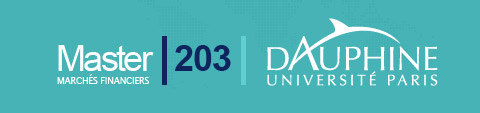

## LAB 2 rules

Assignment has to be done individually. Grades are between 0-20. The assignment counts for 50% of the final grade. You will be asked to build a whole machine learning pipeline and submit your predictions through the ENS data challenge competition interface. You will also have to submit your final notebook and relevant documents with regards to the following planning.

- **Competition start date** : **07 March 2022 15:30**
- **Submissions dead line** : **01 April 2022, 00:59**
- **Work and notebook submission** : **08 April 2022, 23:59**

Final work submissions are made by email at vienne.thibaud@gmail.com. Zip your whole project with underlying folders, notebook and possible report. Email subject should start with [203_lab2].

## Grades

Your work will be marked out of 20 according to 2 criteria :

- **Criteria 1 : Predictive model performance and ranking on ENS data challenge leaderboard ( / 7.5 points).**<br/>
- **Criteria 2 : Relevance of the reported notebook ( / 12.5 points).**<br/>

First criteria grade will be a mixture between your predictive model performance on the competition interface and your competition ranking. Criteria 2 refers to the submitted work relevance. At least you should provide a commented notebook but feel free to provide a small report. More precisely, second criteria grades will be assigned with regards to the following points : 

**Data exploration and features engineering ( / 4 pts)** : 

> - Richness of exploration, analysis and charts provided.<br/>
> - Relevance of interpretations and justifications provided.<br/>
> - Relevance of implemented features, justifications and interpretations in data cleaning and features engineering.
> - Personal initiatives.<br/>
> - Your conclusions for following steps.<br/>

**Machine learning pipeline ( / 6 pts)** : 
> - Relevance of implemented features, justifications and interpretations in machine learning algorithms.
> - Relevance of justifications and interpretations in models evaluation procedure, results and models diagnostic.
> - Personal initiatives.
> - Your conclusions.

**Notebook quality and participation ( / 2.5 pts)** : 

> - Code clearness (structure of the code, comments, written functions…)
> - Notebook clearness (structure of notebook, markdown...).
> - Participation on the forum.
> - ...

## Notebook description

This notebook will be used during the first 3 inclass hours of the competition. Using it, we will try to create a first supervised machine learning model to **recover missing values in financial time series**. Moreover,it can be used as a template to structure your work and so success this lab. It is composed of common machine learning steps :

**Step 0 - Prerequisites** : this is where you will code all your prerequisites including python modules to import and your own functions. It also covers the competition purpose and the description of data.<br/><br/>
**Step 1 - Exploration** : It is a common part in a machine learning pipeline. In this section, you will import datasets, discover the available features, provide some data mining observations, investigate missing values and possible outliers. You can also try to explore the dynamics behing the modelization. An exhaustive exploration is more likely to yield powerful predictive models.<br/><br/>
**Step 2 - Features Engineering** : According to conclusions you get from exploration, you will process the provided data (cleaning, create new features, features selection...).<br/><br/>
**Step 3 - Machine learning experiments** : In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.<br/><br/>
**Step 4 - Final run** : According to the previous steps results and your own interpretation, run your best machine learning algorithm and make predictions for the test set. Then export your results and make a submission on the ENS data challenge platform. Conclude.<br/><br/>

## How to success this lab?

- Be organized. Work on a regular basis. The lab 2 requires time to yield good results.
- Take time to explore data. It will help you to understand features and reach better scores.
- Ask yourself questions. Be critical with results you get.
- Diversify efforts on all parts of machine learning pipeline (exploration, cleaning, features engineering/selection, machine learning...).
- Take initiatives. Try and test! 
- Keep trusting in yourself! you have all the needed knowledge to success this assignement! :)

# Step 0 - Prerequisites 

## Aim of the competition

When computers are responsible for all trading decisions through algorithms, it is very important that their input data be of the best quality possible. However, sometimes values may be missing or contain outliers.

Futures contracts are a promise to deliver some underlying asset (let’s say cotton) at a given expiry date and at a predetermined price; they are for instance useful to a company for locking a price for a future time when they will need the underlying asset (it could be a garment manufacturer, for instance, for cotton).

The goal of this challenge is to recover missing values in financial time series covering 300 futures contracts.

## About data

Dimension : Less than 1,000,000 rows, including 200,000 bid-ask spreads to predict.


> - **product_id** and **liquidity_rank** define a unique futures contract. The dataset contains around 100 product_id (corresponding for instance to a specific type of crude oil). For each product_id several liquidity ranks can exist: liquidity_rank 0 refers to the contract with the closest expiry date (which is often the most traded one), 1 to the next contract to expire, etc. Thus, a contract of rank 1 becomes a contract of rank 0 when the previous contract of rank 0 expires.
> - **dt_close** represents the day number (they are therefore chronological) for each data sample. For a given dt_close there is 1 entry per (product_id, liquidity_rank) pair.
> - **dt_expiry** similarly represents the date of the futures contract expiry.
> - **normal_trading_day** is set to 0 when the market is closed or the market activity is reduced.
> - **open**, **close** represent contract prices, resp. at market opening and close.
> - **high**, **low** represent the highest and lowest price of the contract during the day.
> - **volume** is the number of contracts exchanged during the day, up to a factor that depends only on product_id.
> - **open_interest** is the number of active contracts at the end of the day, with the same factor applied as for the volume.
> **spread** is the “daily bid-ask spread”, which is the value we want to predict.
> **tick_size** is a proxy for 1 unit of spread (this is not directly price difference).
> - **fixed** is set to 1 when one or more features have been fixed for various reason (outliers, missing values…).

Prices are all normalized in some way (the values are thus not in currency units), but they are consistent within each product_id.

### Metric

**Root mean square error (RMSE)** between the predicted daily bid-ask spread and the real one, measured over every missing spread.

### Benchmark

Whereas classical time series problems only allow the use of past data for predictions, participants can exploit the complete time series “to fill the gap”.

A very simple benchmark would be:

> **df['spread'].interpolate(method='linear')**

## Load modules

In this cell, you can put all modules you use. You can use it to provide a clear code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Your functions

In order to have a clear code, you can put all your own functions in this cell.

In [2]:
def export_ens(df_test, pred_test, save=True, path_save="y_test_prediction.csv"):
    """
    Export submissions with the good ENS data challenge format.
    df_test : (pandas dataframe) test set
    proba_test : (numpy ndarray) prediction as a numpy ndarray you get using method .predict()
    save : (bool) if set to True, it will save csv submission in path_save path.
    path_save : (str) path where to save submission.
    return : dataframe for submission
    """
    df_submit = pd.Series(pred_test[:,0], index=df_test.index, name="spread")
    df_submit.to_csv(path_save, index=True)
    return df_submit

def check_test(result, expected, display_error):
    """
    Testing your results.
    """
    if result == expected:
        print("1 test passed.")
    else:
        print(display_error)

# Step 1 - Data Exploration

Data exploration is a common part in a machine learning pipeline. In this section, you will import datasets, discover  features, provide data mining observations, investigate missing values and possible outliers. An exhaustive exploration is more likely to yield prowerful predictive models.

- Read the train dataset inputs and assign to the variable **df_train**.
- Read the train dataset labels and assign to the variable **y_train**.
- Read the test dataset inputs and assign to the variable **df_test**.
- Concat **df_train** and **y_train** to create **df_full**.
- Assign number of rows in train dataset and assign it to variable **n_rows_train**.
- Assign number of rows in test dataset and assign it to variable **n_rows_test**.

## Load datasets

In [37]:
df_train = pd.read_csv(r'/root/LIZA/data/input_training_imet9ZU.csv')
y_train = pd.read_csv(r'/root/LIZA/data/output_training_yCN1f2d.csv')
df_test = pd.read_csv(r'/root/LIZA/data/input_test_4AhEauI.csv')
df_full = pd.merge(df_train, y_train)
n_rows_train = df_train.shape[0]
n_rows_test = df_test.shape[0]

In [38]:
check_test(n_rows_train, 629611, "wrong number of rows")
check_test(n_rows_test, 230304, "wrong number of rows")

1 test passed.
1 test passed.


## Take a look on first rows

Take a look on the **df_train** first 5 rows using method .head().

In [39]:
df_train.head(5)

,ID,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,volume,tick_size,fixed
0,0,8862,401920,0,1,8952,2710.0,2721.0,2624.0,2635.0,2814,402,11,0
1,1,8862,401920,1,1,8995,2610.0,2638.0,2547.0,2560.0,905,107,11,0
2,2,8862,401920,2,1,9039,2530.0,2550.0,2468.0,2478.0,719,41,11,0
3,3,8862,401920,3,1,9104,2497.0,2508.0,2437.0,2443.0,466,25,11,0
4,4,8862,401920,4,1,9213,2474.0,2505.0,2443.0,2452.0,286,11,11,0


## Set ID as index

the column **ID** is the identifier of the osbervations. It is used to retrieve a given prediction with its label. Let's set the column **ID** as the index of the dataframe with the method **set_index()**.

- Set the column **ID** as the index of **df_train**.
- Set the column **ID** as the index of **df_target_train**.
- Set the column **ID** as the index of **df_test**.

In [40]:
df_train = df_train.set_index(['ID'])
y_train = y_train.set_index('ID')
df_test = df_test.set_index('ID')

In [41]:
check_test(df_train.shape[1], 13, "wrong number of columns")
check_test(y_train.shape, (629611, 1), "wrong number of columns")

1 test passed.
1 test passed.


## Look at the distribution of the target

Let's take a look on the column label (spread) in the train dataset. Take a look on the disribution of the label by plotting an histogram with matplotlib.

- Plot the histogram of the serie **y_train**. You can use the parameter **bins** to change the number of slots.
- Describe the serie **y_train** using the method **.describe()**.

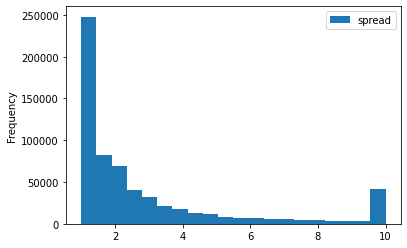

,spread
count,629611.000000
mean,2.844209
std,2.535074
min,1.000000
25%,1.138524
50%,1.810767
75%,3.241183
max,10.000000


In [42]:
# Plot the histogram
hist = y_train.plot.hist(bins=20)
plt.show()

# Describe the serie of label with the method .describe()
y_train.describe()

## Bid-ask spread with respect to the liquidity rank


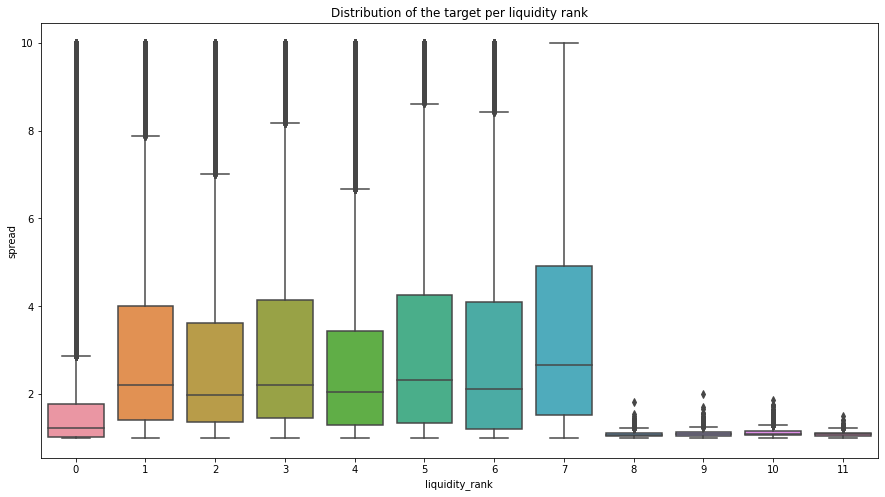

In [43]:
plt.figure(figsize=[15, 8])
ax = sns.boxplot(x='liquidity_rank', y='spread', data=df_full)
plt.title("Distribution of the target per liquidity rank")
plt.show()

## Tick size with respect to the liquidity rank

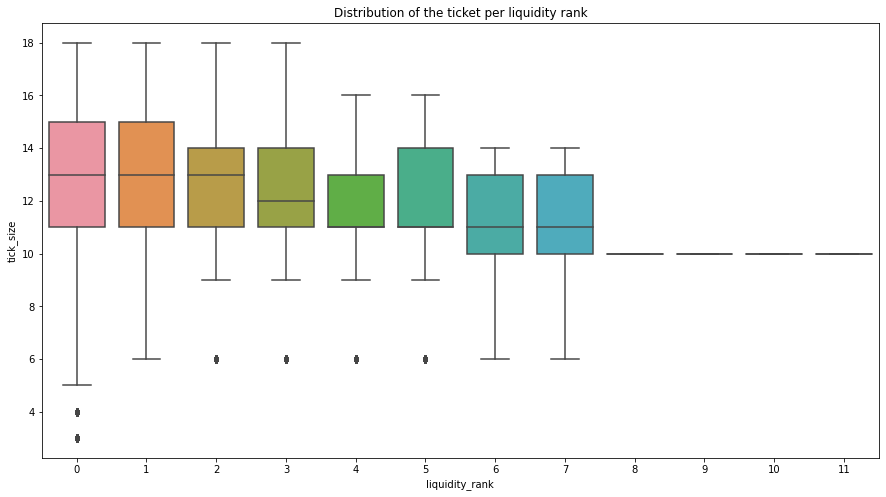

In [44]:
plt.figure(figsize=[15, 8])
ax = sns.boxplot(x='liquidity_rank', y='tick_size', data=df_full)
plt.title("Distribution of the ticket per liquidity rank")
plt.show()

# Step 2 - Features engineering and selection

According to the conclusions you get from step 1 exploration, process your data (features engineering, features selection, dimensionality reduction...). Feel free to create several different datasets if you want to explore different kind of dataframes.

## Compute the mean spread and volatility spread per product

_(Here is an example of fetures engineering + interpretation you can perform to understand your features)._

As seen above, there is a relationship between the bid-ask spread, the product and the liquidity rank. We will use past and future observations to retrieve the bid-ask spreads.

- Create the mean target per product by grouping observations on product and liquidity rank on **df_full**.
- Add a new column **mean_target_per_product** to train and test datasets using the merge function.

In [45]:
# compute mean_target_per_product
mean_target_per_product = df_full.groupby(by = ["product_id", "liquidity_rank"])['spread'].mean()
mean_target_per_product.name = "mean_target_per_product"

# merge on df_train and df_test
df_train = df_train.merge(mean_target_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])
df_test = df_test.merge(mean_target_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])

In [46]:
# compute std_target_per_product
std_target_per_liquidity = df_full.groupby(by = [ "liquidity_rank"])['spread'].std()
std_target_per_liquidity.name = "std_target_per_liquidity"

# merge on df_train and df_test
df_train = df_train.merge(std_target_per_liquidity, how="left", right_index=True, left_on=["liquidity_rank"])
df_test = df_test.merge(std_target_per_liquidity, how="left", right_index=True, left_on=["liquidity_rank"])

#### Compute maturity

In [47]:
df_full['maturity'] = (df_full['dt_expiry']- df_full['dt_close'])/365
df_train['maturity'] = (df_train['dt_expiry']- df_train['dt_close'])/365
df_test['maturity'] = (df_test['dt_expiry']- df_test['dt_close'])/365

## Maturity with respect to the liquidity rank

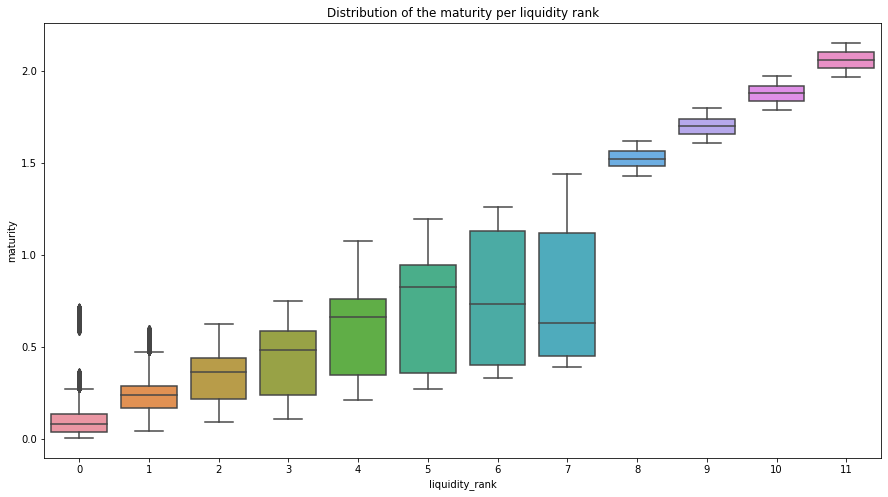

In [48]:
plt.figure(figsize=[15, 8])
ax = sns.boxplot(x='liquidity_rank', y='maturity', data=df_full)
plt.title("Distribution of the maturity per liquidity rank")
plt.show()

#### Compute Price variance usinf open, close, high and low prices

In [49]:
df_full['hml'] = (np.log(df_full['high'])- np.log(df_full['open']))*(np.log(df_full['high'])- np.log(df_full['close'])) - (np.log(df_full['low'])- np.log(df_full['open']))*(np.log(df_full['low'])- np.log(df_full['close']))*100

In [50]:
df_train['hml'] = (np.log(df_train['high'])- np.log(df_train['open']))*(np.log(df_train['high'])- np.log(df_train['close'])) - (np.log(df_train['low'])- np.log(df_train['open']))*(np.log(df_train['low'])- np.log(df_train['close']))*100
df_test['hml'] = (np.log(df_test['high'])- np.log(df_test['open']))*(np.log(df_test['high'])- np.log(df_test['close'])) - (np.log(df_test['low'])- np.log(df_test['open']))*(np.log(df_test['low'])- np.log(df_test['close']))*100

In [51]:
df_train['hml'].describe()

count    629611.000000
mean         -0.008997
std           0.372184
min        -255.932670
25%          -0.005781
50%          -0.001249
75%          -0.000005
max           0.314726
Name: hml, dtype: float64

In [52]:
df_train.drop(df_train.loc[df_train['hml']==df_train['hml'].min()].index, inplace=True)

In [53]:
df_train['hml'].describe()

count    629610.000000
mean         -0.008591
std           0.185724
min         -69.546794
25%          -0.005781
50%          -0.001249
75%          -0.000005
max           0.314726
Name: hml, dtype: float64

In [54]:
df_full.drop(df_full.loc[df_full['hml']==df_full['hml'].min()].index, inplace=True)

In [55]:
mean_hml = df_full.groupby('product_id')['hml'].mean()
mean_hml.name = 'mean_hml'

df_train = df_train.merge(mean_hml, how="left", right_index=True, left_on=["product_id"])
df_test = df_test.merge(mean_hml, how="left", right_index=True, left_on=["product_id"])

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from math import log


def one_hot_encoder(df, col_to_encode, col_is_int=True):
    """
    Performs One Hot Encoding with sklearn.
    df : pandas dataframe containing column to encode
    col_to_encode : (str) column name
    col_is_int : (bool) whether or not column is integer.
    """
    # Create the mapping
    if col_is_int: 
        integer_encoded = df[col_to_encode].reshape(-1, 1)
    else:
        values = df[col_to_encode].tolist()
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
    
    # One hot encoder
    ohe = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    df_temp = pd.DataFrame(ohe.fit_transform(integer_encoded), index=df.index)
    df_temp.columns = ["%s_%s" % (col_to_encode, col) for col in df_temp.columns]
    df_results = pd.concat([df, df_temp], axis=1)
    return df_results

In [57]:
df_train = one_hot_encoder(df_train, "liquidity_rank", False)

In [58]:
df_test = one_hot_encoder(df_test, "liquidity_rank", False)

In [59]:
diff = df_full.sort_values(['product_id', 'liquidity_rank', 'dt_close'])
diff = diff[['product_id', 'liquidity_rank', 'dt_close','spread']]
diff['differ'] = diff['spread'].diff()
diff['differ']  = diff['differ'].fillna(0)

In [60]:
diff = diff[['product_id', 'liquidity_rank', 'dt_close','differ']]

In [61]:
#df_train = df_train.merge(diff, how="left", on=["product_id", "liquidity_rank", 'dt_close'])

In [62]:
mean_diff_per_product = diff.groupby(by = ["product_id", "liquidity_rank"])['differ'].mean()
mean_diff_per_product.name = "mean_diff_per_product"

In [63]:
#df_train = df_train.merge(diff, how="left", on=["product_id", "liquidity_rank", 'dt_close'])
df_train = df_train.merge(mean_diff_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])
df_test = df_test.merge(mean_diff_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])

In [64]:
mean_diff_per_date = diff.groupby(by = ["dt_close"])['differ'].mean()
mean_diff_per_date.name = "mean_diff_per_date"
df_train = df_train.merge(mean_diff_per_date, how="left", right_index=True, left_on=["dt_close"])
df_test = df_test.merge(mean_diff_per_date, how="left", right_index=True, left_on=["dt_close"])

In [65]:
std_diff_per_product = diff.groupby(by = ["product_id", "liquidity_rank"])['differ'].std()
std_diff_per_product.name = "std_diff_per_product"
df_train = df_train.merge(std_diff_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])
df_test = df_test.merge(std_diff_per_product, how="left", right_index=True, left_on=["product_id", "liquidity_rank"])

In [66]:
std_diff_per_date = diff.groupby(by = ["dt_close"])['differ'].std()
std_diff_per_date.name = "std_diff_per_date"
df_train = df_train.merge(std_diff_per_date, how="left", right_index=True, left_on=["dt_close"])
df_test = df_test.merge(std_diff_per_date, how="left", right_index=True, left_on=["dt_close"])

In [33]:
#df_test["id2"] = df_test.index

In [34]:
#df_test.sort_values(['product_id', 'liquidity_rank', 'dt_close'])

,dt_close,product_id,liquidity_rank,normal_trading_day,dt_expiry,open,high,low,close,open_interest,...,liquidity_rank_6,liquidity_rank_7,liquidity_rank_8,liquidity_rank_9,liquidity_rank_10,liquidity_rank_11,mean_diff_per_product,mean_diff_per_date,std_diff_per_product,std_diff_per_date
ID,,,,,,,,,,,,,,,,,,,,,
10429,8895,401920,0,1,8952,2346.0,2389.0,2317.0,2329.0,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000594,0.020294,0.326679,1.238316
10755,8896,401920,0,1,8952,2325.0,2360.0,2320.0,2344.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000594,0.056229,0.326679,1.394376
11081,8897,401920,0,1,8952,2341.0,2353.0,2268.0,2280.0,1988,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000594,-0.085144,0.326679,1.468887
11397,8898,401920,0,1,8952,2298.0,2324.0,2262.0,2275.0,1825,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000594,0.077903,0.326679,1.453304
11705,8899,401920,0,1,8952,2310.0,2314.0,2276.0,2308.0,2070,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000594,0.082457,0.326679,1.572931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856590,11442,199478784,0,1,11452,6952.0,6974.0,6891.0,6936.0,1859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012076,0.019644,1.892032,0.702481
856910,11443,199478784,0,1,11452,6923.0,6937.0,6865.0,6884.0,1857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012076,-0.031561,1.892032,0.682153
857250,11444,199478784,0,1,11452,6887.0,6943.0,6855.0,6888.0,1599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012076,0.339534,1.892032,1.324968


In [35]:
#df_test = pd.merge_asof( df_test, diff.sort_values('dt_close'),  on='dt_close', by = ["product_id", "liquidity_rank"])

In [36]:
#df_test = df_test.set_index('id2')

## Features selection

Before running a machine learning algorithm, we have to select the features relevant with our modelization.
- In this section, select a set of features you want to use in your machine learning pipeline. Assign this list in the variable **features**. For example, you can start with features ["liquidity_rank", "normal_trading_day", "open_interest", "mean_target_per_product"].
- Make sure that you have removed the feature **ID** from this list as it is not relevant for the model.

Note : You can access a dataframe columns using the dataframe's attribute **.columns**

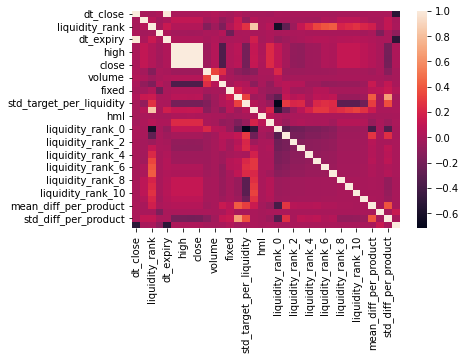

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df_train.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [113]:
features_test = pd.DataFrame(df_test)
#features_test = pd.DataFrame(df_test, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11',"volume", "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
#features_test = pd.DataFrame(df_test, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','volume',  'fixed', "product_id",  "open_interest", "mean_target_per_product",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
#features_test = pd.DataFrame(df_test, columns= ['volume',   "open_interest", "mean_target_per_product",  'maturity'])
#features_test = pd.DataFrame(df_test, columns= ["volume",  "hml", "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml'])

In [114]:
features_train = pd.DataFrame(df_train)
#features_train = pd.DataFrame(df_train, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11', "volume",  "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
#features_train = pd.DataFrame(df_train, columns= ['mean_diff_per_date','std_diff_per_product','std_diff_per_date','mean_diff_per_product','hml','volume',  "fixed", "product_id","open_interest", "mean_target_per_product",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
#features_train = pd.DataFrame(df_train, columns= ['volume',  "open_interest", "mean_target_per_product",  'maturity'])
#features_train = pd.DataFrame(df_train, columns= ["volume",  "hml", "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml'])

In [70]:
check_test("ID" not in features_test, True, "error : column ID still in the features.")

1 test passed.


## Other things you can try

There are a lot ot experiments you can try to process your data. If you lack in ideas, here are some you can try :

- Create new insights from the raw data. 
- Perform features selection / dimensionality reduction to enhance the features.
- ...

Once again, feel completly free to provide your own process, interpretations and conclusions...

# Step 3 - Machine learning algorithms experiments

In this part, you will test different machine learning algorithms and configurations. It is your sandbox before running the final machine learning model. You will also have to evaluate your results and interpret it.

## Validation procedure

In this section, we will split our dataset into a train set and a validation set. Asn an example, we will use the simple **train_test_split** approach. However, you are free to choose the validation procedure. Justify your choices.

- Using the train-test split approach, split your train dataframe. Assign the resulting dataframes to variables **x_train**, **x_val**, **y_train** and **y_val**.

In [115]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features_train, df_full['spread'])
x_test = features_test

## Vanilla linear regression

Let us test a first linear regression model with default parameters and all the features.

- Train a simple linear regression and assign the resulting model to the variable **model**.
- Use the model to make predictions on the train set samples. Assign the resulting serie to **pred_train**.
- Use the model to make predictions on the validation set samples. Assign the resulting serie to **pred_val**.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

reg = LinearRegression()
model = reg.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_val = model.predict(x_val)

## Evaluate the results of the vanilla linear regression

Classification metrics for this lab is the MSE (Mean Squared Error). Sklearn provides an implementation of this metrics [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). According to you, are you in an underfitting or an overfitting situation?

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def compute_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

rmse_train = compute_rmse(y_train, pred_train)
rmse_val = compute_rmse(y_val, pred_val)

print("RMSE score on train dataset : %s" % rmse_train)
print("RMSE score on validation dataset : %s" % rmse_val)

RMSE score on train dataset : 1.2949980103807208
RMSE score on validation dataset : 1.294632415336909


## Random Forest model

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

# Prerequisites :
depths = range(22, 26)
all_rmse_train = []
all_rmse_val = []
experiments  = []
all_rmse_train_tree = []
all_rmse_train_forest = []
all_rmse_val_tree = []
all_rmse_val_forest = []


for depth in depths: 
        # Random Forest
        clf_forest = RandomForestRegressor(n_estimators=100, max_depth=depth, n_jobs=-1)
        model_forest = clf_forest.fit(x_train, y_train)

        pred_train = pd.Series(model_forest.predict(x_train), index=y_train.index)
        pred_val = pd.Series(model_forest.predict(x_val), index=y_val.index)


        # Compute MSLE evaluation metrics
        rmse_train = compute_rmse(y_train, pred_train)
        rmse_val = compute_rmse(y_val, pred_val)
        all_rmse_train.append(rmse_train)
        all_rmse_val.append(rmse_val)

        print("depth = %s | RMSE train = %s | RMSE val = %s" % (depth, rmse_train, rmse_val))

depth = 22 | RMSE train = 0.30955280524783074 | RMSE val = 0.6954842000532563
depth = 23 | RMSE train = 0.29419381457059285 | RMSE val = 0.6943361306626881
depth = 24 | RMSE train = 0.2836879827946212 | RMSE val = 0.69504272416622
depth = 25 | RMSE train = 0.2762030149063788 | RMSE val = 0.694081490112042


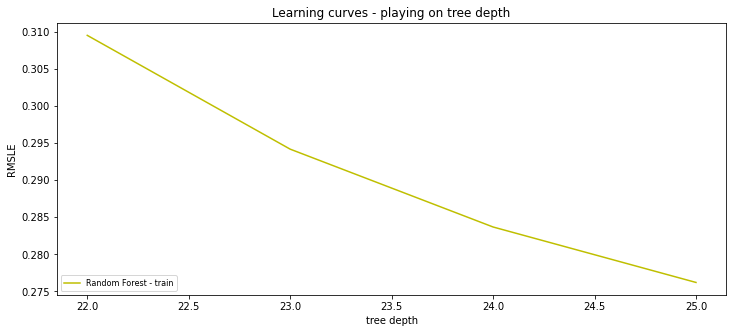

In [111]:
fig = plt.figure(figsize=[12, 5])
plt.plot(depths, all_rmse_train, color="y", label="Random Forest - train")                                                
plt.xlabel("tree depth")
plt.ylabel("RMSLE")
plt.title("Learning curves - playing on tree depth")
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

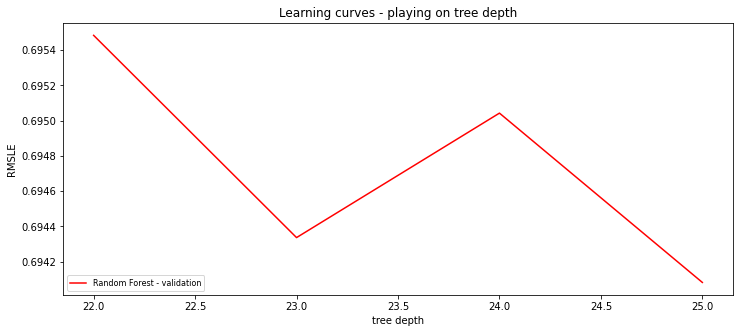

In [112]:
fig = plt.figure(figsize=[12, 5])
plt.plot(depths, all_rmse_val, color="r", label="Random Forest - validation")                                                  
plt.xlabel("tree depth")
plt.ylabel("RMSLE")
plt.title("Learning curves - playing on tree depth")
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

In [50]:
estimators = range(100, 450, 100)
all_rmse_train = []
all_rmse_val = []
experiments  = []
all_rmse_train_tree = []
all_rmse_train_forest = []
all_rmse_val_tree = []
all_rmse_val_forest = []


for estimator in estimators: 

    # Random Forest
    clf_forest = RandomForestRegressor(n_estimators=estimator, max_depth=24, n_jobs=-1)
    model_forest = clf_forest.fit(x_train, y_train)
    
    pred_train = pd.Series(model_forest.predict(x_train), index=y_train.index)
    pred_val = pd.Series(model_forest.predict(x_val), index=y_val.index)


        # Compute MSLE evaluation metrics
    rmse_train = compute_rmse(y_train, pred_train)
    rmse_val = compute_rmse(y_val, pred_val)
    all_rmse_train.append(rmse_train)
    all_rmse_val.append(rmse_val)
    print("estimator = %s | RMSE train = %s | RMSE val = %s" % (estimator, rmse_train, rmse_val))

estimator = 100 | RMSE train = 0.2829432528715012 | RMSE val = 0.6959073843463459
estimator = 200 | RMSE train = 0.2809174538588833 | RMSE val = 0.693789495808403
estimator = 300 | RMSE train = 0.27986429523948286 | RMSE val = 0.6936173888880286
estimator = 400 | RMSE train = 0.279524427055704 | RMSE val = 0.6934513777398031


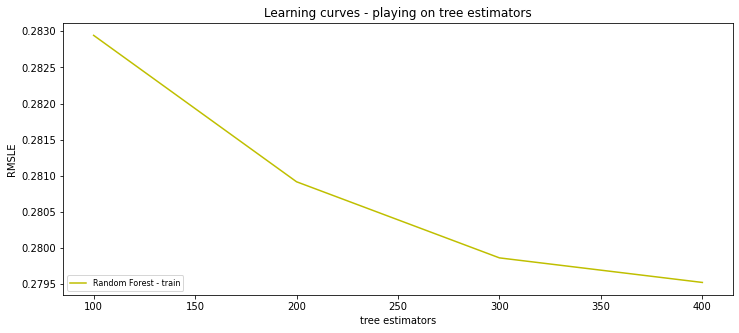

In [61]:
fig = plt.figure(figsize=[12, 5])

plt.plot(estimators, all_rmse_train, color="y", label="Random Forest - train")
                                              
plt.xlabel("tree estimators")
plt.ylabel("RMSLE")
plt.title("Learning curves - playing on tree estimators")
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

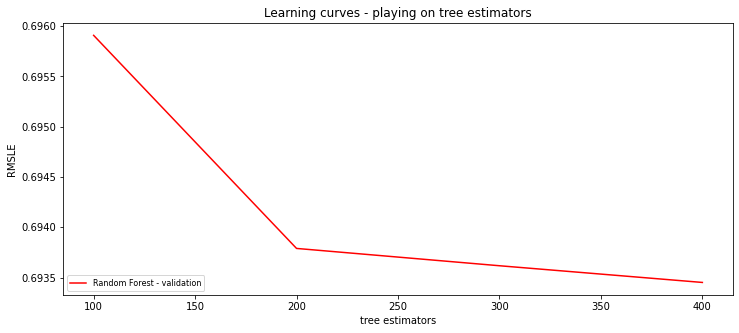

In [62]:
fig = plt.figure(figsize=[12, 5])
plt.plot(estimators, all_rmse_val, color="r", label="Random Forest - validation")
plt.xlabel("tree estimators")
plt.ylabel("RMSLE")
plt.title("Learning curves - playing on tree estimators")
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

### Select Features by comparing feature importance

RMSE train : 0.2792939567334985
RMSE validation : 0.6888262369597117
mean_diff_per_product 0.007830841252857584
std_diff_per_product 0.012556055995105847
mean_diff_per_date 0.010312854033338238
std_diff_per_date 0.011533934545986878
hml 0.011412453245468395
liquidity_rank_1 0.002301282862864728
liquidity_rank_2 0.0003624241562743198
liquidity_rank_3 0.0002637927028441977
liquidity_rank_4 0.00019341591811685048
liquidity_rank_5 0.00047913801775583076
liquidity_rank_6 0.0001298385854587855
liquidity_rank_7 0.00012491754324413915
liquidity_rank_8 2.1993463645766936e-08
liquidity_rank_9 3.6048307075206475e-08
liquidity_rank_10 2.6996270077602815e-08
liquidity_rank_11 3.2962230518917192e-09
volume 0.03020445693853531
fixed 0.003624624300074221
product_id 0.004401598215070848
normal_trading_day 0.0007131747779666049
open_interest 0.02596026628672818
mean_target_per_product 0.7235122674975124
std_target_per_liquidity 0.0017416117468912063
maturity 0.025387334988483758
tick_size 0.006863485123

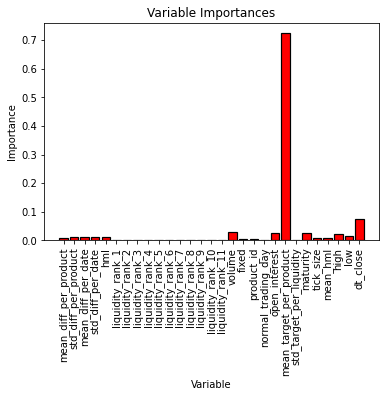

In [80]:
clf_forest = RandomForestRegressor(n_estimators=400, max_depth=24, n_jobs=-1)
model_forest = clf_forest.fit(x_train, y_train)

pred_train = pd.Series(model_forest.predict(x_train), index=y_train.index)
pred_val = pd.Series(model_forest.predict(x_val), index=y_val.index)

rmse_train = compute_rmse(y_train, pred_train)
rmse_val = compute_rmse(y_val, pred_val)

print("RMSE train : %s" % rmse_train)
print("RMSE validation : %s" % rmse_val)

importances = model_forest.feature_importances_

for name, importance in zip(x_train.columns, clf_forest.feature_importances_):
    print(name, importance)

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, features_train, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

In [ ]:
features_train = pd.DataFrame(df_train, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11', "volume",  "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
features_test = pd.DataFrame(df_test, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11', "volume",  "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])

x_train, x_val, y_train, y_val = train_test_split(features_train, df_full['spread'])
x_test = features_test

## XGBoost Model

In [81]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
depths = range(10, 15)
estimators = range(100,350,100)
all_rmse_train = []
all_rmse_val = []
experiments  = []
all_rmse_train_tree = []
all_rmse_train_forest = []
all_rmse_val_tree = []
all_rmse_val_forest = []


for depth in depths: 
    for estimator in estimators:
        # Random Forest
        clf_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=estimator, max_depth=depth)
        model_xgb = clf_xgb.fit(x_train, y_train)

        pred_train = pd.Series(model_xgb.predict(x_train), index=y_train.index)
        pred_val = pd.Series(model_xgb.predict(x_val), index=y_val.index)


        # Compute MSLE evaluation metrics
        rmse_train = compute_rmse(y_train, pred_train)
        rmse_val = compute_rmse(y_val, pred_val)

        print("depth = %s |estimator = %s | RMSE train = %s | RMSE val = %s" % (depth, estimator, rmse_train, rmse_val))

In [131]:
model = XGBRegressor(objective='reg:squarederror', max_depth = 10, n_estimators=200)
model_xgb = model.fit(x_train, y_train)

pred_train = model_xgb.predict(x_train)
pred_val = model_xgb.predict(x_val)
pred_test = model_xgb.predict(x_test)

rmse_train = compute_rmse(y_train, pred_train)
rmse_val = compute_rmse(y_val, pred_val)

print("RMSE score on train dataset : %s" % rmse_train)
print("RMSE score on validation dataset : %s" % rmse_val)

RMSE score on train dataset : 0.4082135890980154
RMSE score on validation dataset : 0.7228224667617682


## Neural Network

In [ ]:
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(2500, input_dim=len(x_train.columns), activation='relu', name='layer_input'))
model.add(Dense(1000, activation='relu', name='layer_1'))
model.add(Dense(500, activation='relu', name='layer_2'))
model.add(Dense(100, activation='relu', name='layer_3'))
model.add(Dense(30, activation='relu', name='layer_4'))
model.add(Dense(1, activation='relu', name='layer_output')) 

optimizer="adam"
loss="mean_squared_error"
metrics = ['mean_squared_logarithmic_error']
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)


epochs = 3
batch_size = None
model_trained = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/3
  241/14757 [..............................] - ETA: 7:52 - loss: 64588791808.0000 - mean_squared_logarithmic_error: 2.3927

In [88]:
pred_train = model.predict(x_train)
pred_val = model.predict(x_val)


rmse_train = compute_rmse(y_train, pred_train)
rmse_val = compute_rmse(y_val, pred_val)

print("RMSE score on train dataset : %s" % rmse_train)
print("RMSE score on validation dataset : %s" % rmse_val)

RMSE score on train dataset : 3.8094118776841372
RMSE score on validation dataset : 3.811780254381318


In [84]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters = 5, max_iter = 2000, algorithm = 'auto')
kmeans.fit(x_train)

KMeans(max_iter=2000, n_clusters=5)

# Step 4 - Final run

According to previous steps results and your own interpretation, run your best machine learning algorithm and make  predictions on the test set. Then export your results in and make submission on Kaggle platform.

## Run your best model and make prediction on test set

For this first experiment, use the vanilla linear regresson we have experimented in step 3. Make predictions on the test set and assign the results to variable **pred_test**.

In [92]:
features_train = pd.DataFrame(df_train, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11', "volume",  "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])
features_test = pd.DataFrame(df_test, columns= ['mean_diff_per_product','std_diff_per_product','mean_diff_per_date','std_diff_per_date','hml','liquidity_rank_1', 'liquidity_rank_2','liquidity_rank_3','liquidity_rank_4','liquidity_rank_5','liquidity_rank_6','liquidity_rank_7','liquidity_rank_8','liquidity_rank_9','liquidity_rank_10','liquidity_rank_11', "volume",  "fixed", "product_id", "normal_trading_day", "open_interest", "mean_target_per_product", "std_target_per_liquidity",  'maturity', 'tick_size', 'mean_hml', 'high', 'low', 'dt_close'])

In [101]:
x_train, x_val, y_train, y_val = train_test_split(features_train, df_full['spread'])
x_test = features_test

In [94]:
clf_forest = RandomForestRegressor(n_estimators=400, max_depth=24, n_jobs=-1)
model_forest = clf_forest.fit(x_train, y_train)

pred_train = pd.Series(model_forest.predict(x_train), index=y_train.index)
pred_val = pd.Series(model_forest.predict(x_val), index=y_val.index)

rmse_train = compute_rmse(y_train, pred_train)
rmse_val = compute_rmse(y_val, pred_val)

print("RMSE train : %s" % rmse_train)
print("RMSE validation : %s" % rmse_val)


RMSE train : 0.27765106979354
RMSE validation : 0.6919846782470672


In [104]:
x_test = x_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [105]:
pred_test = model_forest.predict(x_test)
pred_test = pred_test.reshape(-1,1)
pred_test.shape
df_submit = export_ens(df_test, pred_test, True, r"/root/LIZA/results/OrlovaE.csv")